<a href="https://colab.research.google.com/github/dickyudhapratama/UAS_TextMinning_22.01.85.0004/blob/main/Text_Minning_Review_Rumah_Sakit_Dengan_Serpapi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install google-search-results

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for google-search-results: filename=google_search_results-2.4.1-py3-none-any.whl size=25788 sha256=33342a29f501d236e5b878fbfcfff650e0d497913de627cccb56c2bd4121c4b3
  Stored in directory: /root/.cache/pip/wheels/ea/58/9e/3d89ebff948ef9ce0a6e056a8279c1f93c76993387766f8387
Successfully built google-search-results


In [2]:
from serpapi import GoogleSearch
from urllib.parse import urlsplit, parse_qsl
import json
import googlesearch
from urllib.parse import urlparse, urlunparse, urljoin, urldefrag,urlsplit, urlunsplit, urlencode, parse_qs,parse_qsl,quote, quote_plus, quote_from_bytes, unquote,unquote_plus,unquote_to_bytes,DefragResult, ParseResult,SplitResult, DefragResultBytes, ParseResultBytes, SplitResultBytes

In [44]:
params = {
  "api_key": "d93aa515a57cf52489669d191f2f06c395b91c5db2a3110aef40690b973462ce",
  "engine": "google_maps",
  "q": "RumahSakit_Semarang",
  "google_domain": "google.com",
  "hl": "en",
  "ll": "@-7.0338893,110.4638449,17z" ,
  "type": "search"
}
search = GoogleSearch(params)

mPosition = 0 # Angka indeks dari data
mNums = 5 # Batas jumlah data yang ditampilkan
local_results = []

while mPosition <= mNums:
  results = search.get_dict()

  for result in results["local_results"]: 
    mPosition += 1
    
    if mPosition <= mNums:
      
      # Jika jumlah review kurang dari 150, maka jangan masukkan datanya
      if result["reviews"] < 150:
        mNums += 1
        continue
        
      # Append data sesuai dengan batas jumlah yang sudah ditentukan
      local_results.append({'title': result["title"],
                           'data_id': result["data_id"],
                           'reviews_total': result["reviews"]});

  if "next" in results.get("serpapi_pagination", {}):
    # Akan mengubah parameter dari 'GoogleSearch()' dengan isi parameter dari halaman selanjutnya
    search.params_dict.update(dict(parse_qsl(urlsplit(results.get("serpapi_pagination").get("next")).query)))

  else:
    break

https://serpapi.com/search


KeyError: ignored

In [10]:
for lr in local_results:
  print(lr)

{'title': 'Rumah Sakit Umum Daerah KRMT Wongsonegoro', 'data_id': '0x2e708c49e65c76ed:0x8bd248445c2a62fb', 'reviews_total': 950}


In [11]:
data = {'rumahsakit_name':[],
        'name':[],
        'rating':[],
        'review':[]}

for lr in local_results:
  
  params = {
    "engine": "google_maps_reviews",
    "data_id": "",
    "api_key": "d93aa515a57cf52489669d191f2f06c395b91c5db2a3110aef40690b973462ce"
  }
  
  params["data_id"] = lr['data_id']

  search = GoogleSearch(params)

  mPosition = 0 # Angka indeks dari data
  mNums = 100 # Batas jumlah data yang ditampilkan

  while mPosition <= mNums:
    results = search.get_dict()

    for result in results["reviews"]:
      mPosition += 1

      if mPosition <= mNums:
        # Append data sesuai dengan batas jumlah yang sudah ditentukan
        data['rumahsakit_name'].append(lr['title']);
        data['name'].append(result["user"]["name"]);
        data['rating'].append(result["rating"]);
        data['review'].append(result["snippet"]);
    if "next" in results.get("serpapi_pagination", {}):
      # Akan mengubah parameter dari 'GoogleSearch()' dengan isi parameter dari halaman selanjutnya
      search.params_dict.update(dict(parse_qsl(urlsplit(results.get("serpapi_pagination").get("next")).query)))

    else:
      break
    
review_original = data['review']

https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search


In [12]:
import pandas as pd
df_original = pd.DataFrame(data)
df_original.to_csv('review_rumahsakit.csv', index=False)

In [13]:
df_original

,rumahsakit_name,name,rating,review
0,Rumah Sakit Umum Daerah KRMT Wongsonegoro,bram isani nugroho,5.0,The best and good services hospitalThx u so much
1,Rumah Sakit Umum Daerah KRMT Wongsonegoro,Rosemarie Jr,4.0,good servicefor those who want to be vaccinate...
2,Rumah Sakit Umum Daerah KRMT Wongsonegoro,hengki firman syah,4.0,My wife gave birth in this hospital with Dr. K...
3,Rumah Sakit Umum Daerah KRMT Wongsonegoro,Eko Budi,5.0,public hospital of semarangnew building: gatot...
4,Rumah Sakit Umum Daerah KRMT Wongsonegoro,Dody Adiyanto,5.0,"Security ramah"""
...,...,...,...,...
95,Rumah Sakit Umum Daerah KRMT Wongsonegoro,Anak Manang,1.0,(Translated by Google) Parking facilities are ...
96,Rumah Sakit Umum Daerah KRMT Wongsonegoro,Jk Rooms,4.0,(Translated by Google) During the Covid 19 pan...
97,Rumah Sakit Umum Daerah KRMT Wongsonegoro,Putri Aulia Ramadhani,5.0,(Translated by Google) The information service...
98,Rumah Sakit Umum Daerah KRMT Wongsonegoro,Eko Apriyadi,5.0,(Translated by Google) Service and care for pa...


In [14]:
review_remove_translated = []

for review in review_original:
  review_sep = review.split("(Translated by Google) ")
  
  # Jika terdapat (Translated by Google)
  if review_sep[0] == "":
    review_sep = ("".join(review_sep)).split("(Original)")
    review_sep = review_sep[0]
    review = "".join(review_sep)
    
  review_remove_translated.append(review)

In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

# Warnings
import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns', None)

In [16]:
df= pd.read_csv('review_rumahsakit.csv', encoding ='latin1')
df

,rumahsakit_name,name,rating,review
0,Rumah Sakit Umum Daerah KRMT Wongsonegoro,bram isani nugroho,5.0,The best and good services hospitalThx u so much
1,Rumah Sakit Umum Daerah KRMT Wongsonegoro,Rosemarie Jr,4.0,good servicefor those who want to be vaccinate...
2,Rumah Sakit Umum Daerah KRMT Wongsonegoro,hengki firman syah,4.0,My wife gave birth in this hospital with Dr. K...
3,Rumah Sakit Umum Daerah KRMT Wongsonegoro,Eko Budi,5.0,public hospital of semarangnew building: gatot...
4,Rumah Sakit Umum Daerah KRMT Wongsonegoro,Dody Adiyanto,5.0,"Security ramah"""
...,...,...,...,...
95,Rumah Sakit Umum Daerah KRMT Wongsonegoro,Anak Manang,1.0,(Translated by Google) Parking facilities are ...
96,Rumah Sakit Umum Daerah KRMT Wongsonegoro,Jk Rooms,4.0,(Translated by Google) During the Covid 19 pan...
97,Rumah Sakit Umum Daerah KRMT Wongsonegoro,Putri Aulia Ramadhani,5.0,(Translated by Google) The information service...
98,Rumah Sakit Umum Daerah KRMT Wongsonegoro,Eko Apriyadi,5.0,(Translated by Google) Service and care for pa...


In [17]:
df.drop(columns = ['rumahsakit_name', 'name'], inplace = True)
df.columns = ['Rating', 'Review']
df.head()

,Rating,Review
0,5.0,The best and good services hospitalThx u so much
1,4.0,good servicefor those who want to be vaccinate...
2,4.0,My wife gave birth in this hospital with Dr. K...
3,5.0,public hospital of semarangnew building: gatot...
4,5.0,"Security ramah"""


Preprocessing Data

Cleaning The Text

In [18]:
import string
import re

In [19]:
def clean_Review(Review):
    return re.sub('[^a-zA-Z]', ' ', Review).lower()
  
df['cleaned_Review'] = df['Review'].apply(lambda x: clean_Review(str(x)))
df['label'] = df['Rating'].map({1.0:0, 2.0:0, 3.0:0, 4.0:1, 5.0:1})

Adding additional features - length of, and percentage of punctuations in the text

In [20]:
def count_punct(Review):
    count = sum([1 for char in Review if char in string.punctuation])
    return round(count/(len(Review) - Review.count(" ")), 3)*100
  
df['Review_len'] = df['Review'].apply(lambda x: len(str(x)) - str(x).count(" "))
df['punct'] = df['Review'].apply(lambda x: count_punct(str(x)))
df

,Rating,Review,cleaned_Review,label,Review_len,punct
0,5.0,The best and good services hospitalThx u so much,the best and good services hospitalthx u so much,1,40,0.0
1,4.0,good servicefor those who want to be vaccinate...,good servicefor those who want to be vaccinate...,1,110,4.5
2,4.0,My wife gave birth in this hospital with Dr. K...,my wife gave birth in this hospital with dr k...,1,128,2.3
3,5.0,public hospital of semarangnew building: gatot...,public hospital of semarangnew building gatot...,1,73,1.4
4,5.0,"Security ramah""",security ramah,1,14,7.1
...,...,...,...,...,...,...
95,1.0,(Translated by Google) Parking facilities are ...,translated by google parking facilities are ...,0,173,4.6
96,4.0,(Translated by Google) During the Covid 19 pan...,translated by google during the covid pan...,1,417,4.3
97,5.0,(Translated by Google) The information service...,translated by google the information service...,1,161,4.3
98,5.0,(Translated by Google) Service and care for pa...,translated by google service and care for pa...,1,482,2.3


In [21]:
def tokenize_Review(Review):
    tokenized_Review = Review.split()
    return tokenized_Review
  
df['tokens'] = df['cleaned_Review'].apply(lambda x: tokenize_Review(x))
df.head()

,Rating,Review,cleaned_Review,label,Review_len,punct,tokens
0,5.0,The best and good services hospitalThx u so much,the best and good services hospitalthx u so much,1,40,0.0,"[the, best, and, good, services, hospitalthx, ..."
1,4.0,good servicefor those who want to be vaccinate...,good servicefor those who want to be vaccinate...,1,110,4.5,"[good, servicefor, those, who, want, to, be, v..."
2,4.0,My wife gave birth in this hospital with Dr. K...,my wife gave birth in this hospital with dr k...,1,128,2.3,"[my, wife, gave, birth, in, this, hospital, wi..."
3,5.0,public hospital of semarangnew building: gatot...,public hospital of semarangnew building gatot...,1,73,1.4,"[public, hospital, of, semarangnew, building, ..."
4,5.0,"Security ramah""",security ramah,1,14,7.1,"[security, ramah]"


Tokenization

In [22]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [23]:
def lemmatize_Review(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_Review'] = df['tokens'].apply(lambda x: lemmatize_Review(x))
df.head()

,Rating,Review,cleaned_Review,label,Review_len,punct,tokens,lemmatized_Review
0,5.0,The best and good services hospitalThx u so much,the best and good services hospitalthx u so much,1,40,0.0,"[the, best, and, good, services, hospitalthx, ...",best good service hospitalthx u much
1,4.0,good servicefor those who want to be vaccinate...,good servicefor those who want to be vaccinate...,1,110,4.5,"[good, servicefor, those, who, want, to, be, v...",good servicefor want vaccinated prepared copy ...
2,4.0,My wife gave birth in this hospital with Dr. K...,my wife gave birth in this hospital with dr k...,1,128,2.3,"[my, wife, gave, birth, in, this, hospital, wi...",wife gave birth hospital dr kartika love hospi...
3,5.0,public hospital of semarangnew building: gatot...,public hospital of semarangnew building gatot...,1,73,1.4,"[public, hospital, of, semarangnew, building, ...",public hospital semarangnew building gatotkaca...
4,5.0,"Security ramah""",security ramah,1,14,7.1,"[security, ramah]",security ramah


EDA

In [24]:
#  Shape of the dataset, and breakdown of the classes
print(f"Input data has { len(df) } rows and { len(df.columns) } columns")
print(f"Rating 1.0 = { len(df[df['Rating']==1.0]) } rows")
print(f"Rating 2.0 = { len(df[df['Rating']==2.0]) } rows")
print(f"Rating 3.0 = { len(df[df['Rating']==3.0]) } rows")
print(f"Rating 4.0 = { len(df[df['Rating']==4.0]) } rows")
print(f"Rating 5.0 = { len(df[df['Rating']==5.0]) } rows")

Input data has 100 rows and 8 columns
Rating 1.0 = 14 rows
Rating 2.0 = 5 rows
Rating 3.0 = 9 rows
Rating 4.0 = 15 rows
Rating 5.0 = 57 rows


Number of null in label: 0
Number of null in text: 0


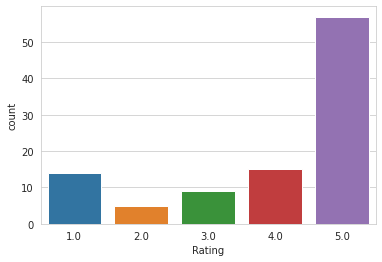

In [25]:
# Missing values in the dataset
print(f"Number of null in label: { df['Rating'].isnull().sum() }")
print(f"Number of null in text: { df['Review'].isnull().sum() }")
sns.countplot(x='Rating', data=df);


Visualizing Word Clouds

In [26]:
from wordcloud import WordCloud

In [27]:
df_negative = df[ (df['Rating']==1.0) | (df['Rating']==2.0) | (df['Rating']==3.0) ]
df_positive = df[ (df['Rating']==4.0) | (df['Rating']==5.0) ]

#convert to list
negative_list=df_negative['lemmatized_Review'].tolist()
positive_list=df_positive['lemmatized_Review'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of negative
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of positive
filtered_positive = filtered_positive.lower()

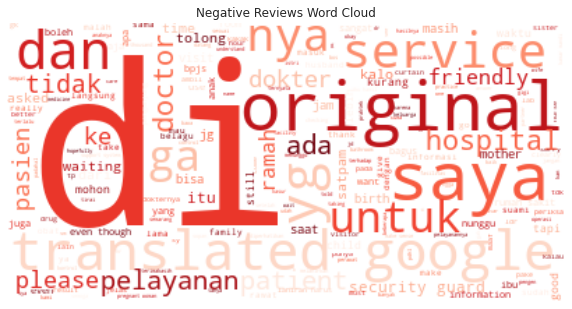

In [28]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

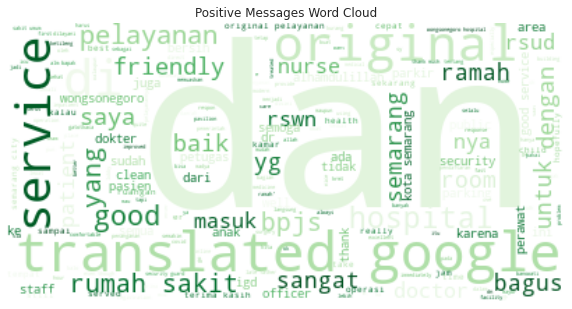

In [29]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Messages Word Cloud")
plt.show()

Feature Extraction from Text

In [30]:
X = df[['lemmatized_Review', 'Review_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(100, 3)
(100,)


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(70, 3)
(30, 3)
(70,)
(30,)


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_Review'])
tfidf_test = tfidf.transform(X_test['lemmatized_Review'])

X_train_vect = pd.concat([X_train[['Review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['Review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,Review_len,punct,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553
0,553,4.5,0.0,0.000000,0.163489,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.136274,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.163489,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.163489,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.143433,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.112476,0.0,0.0,0.0,0.100299,0.0,0.0,0.143595,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.163489,0.0,0.0,0.0,0.0,0.0,0.087089,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.152194,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.143433,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.120355,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.116219,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.120355,0.0,0.0,0.24071,0.120355,0.0,0.097765,0.000000,0.163489,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.163489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.163489,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.163489,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0

Training different Classification models

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Menggunakan Algoritma Multinomia Naive Bayes

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.70      1.00      0.82        21

    accuracy                           0.70        30
   macro avg       0.35      0.50      0.41        30
weighted avg       0.49      0.70      0.58        30



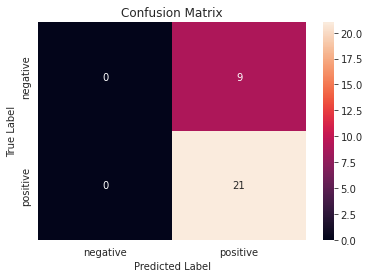

In [34]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma Random Forest Classiefier

              precision    recall  f1-score   support

           0       1.00      0.11      0.20         9
           1       0.72      1.00      0.84        21

    accuracy                           0.73        30
   macro avg       0.86      0.56      0.52        30
weighted avg       0.81      0.73      0.65        30



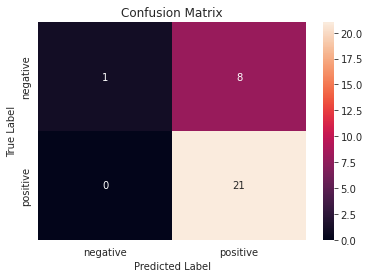

In [35]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(X_train_vect, y_train)
random_forest_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, random_forest_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma Logistic Regression

              precision    recall  f1-score   support

           0       0.57      0.44      0.50         9
           1       0.78      0.86      0.82        21

    accuracy                           0.73        30
   macro avg       0.68      0.65      0.66        30
weighted avg       0.72      0.73      0.72        30



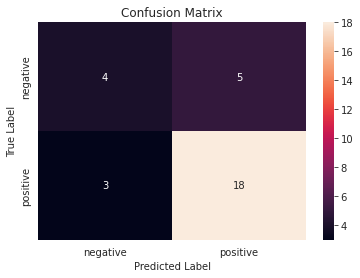

In [36]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_vect, y_train)
log_reg_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma Support Vector Machine

              precision    recall  f1-score   support

           0       0.67      0.44      0.53         9
           1       0.79      0.90      0.84        21

    accuracy                           0.77        30
   macro avg       0.73      0.67      0.69        30
weighted avg       0.75      0.77      0.75        30



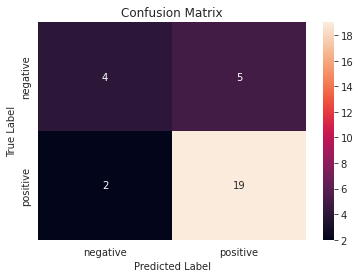

In [37]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_vect, y_train)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma KNN (K NEAREST NEIGHBOUR)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.67      0.86      0.75        21

    accuracy                           0.60        30
   macro avg       0.33      0.43      0.38        30
weighted avg       0.47      0.60      0.53        30



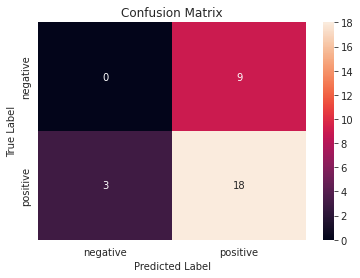

In [38]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_vect, y_train)
knn_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan algoritma Extra Tress Classifier

              precision    recall  f1-score   support

           0       1.00      0.22      0.36         9
           1       0.75      1.00      0.86        21

    accuracy                           0.77        30
   macro avg       0.88      0.61      0.61        30
weighted avg       0.82      0.77      0.71        30



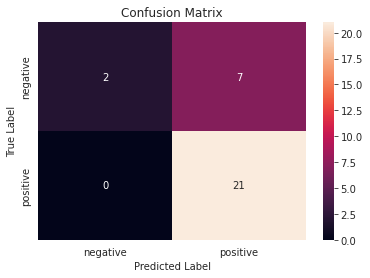

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)
classifier.fit(X_train_vect, y_train)
extra_trees_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, extra_trees_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, extra_trees_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

K=10

In [40]:
from sklearn.model_selection import cross_val_score

models = [
          MultinomialNB(),
          LogisticRegression(),
          RandomForestClassifier(n_estimators = 150),
          SVC(kernel = 'linear'),
          KNeighborsClassifier(n_neighbors = 5),
          ExtraTreesClassifier(n_estimators=150, random_state=50)
         ]
names = ["Naive Bayes", "Logistic Regression", "Random Forest", "SVM", "KNN", "Extra Trees"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f" {score} - {cross_val_score(model, X_train_vect, y_train, scoring=score, cv=10).mean()} ")
    print()

Naive Bayes
 accuracy - 0.7285714285714286 
 precision - 0.7285714285714286 
 recall - 1.0 
 f1 - 0.8423076923076922 

Logistic Regression
 accuracy - 0.7428571428571428 
 precision - 0.7704761904761904 
 recall - 0.9433333333333334 
 f1 - 0.842121212121212 

Random Forest
 accuracy - 0.7428571428571429 
 precision - 0.7404761904761905 
 recall - 1.0 
 f1 - 0.8498834498834498 

SVM
 accuracy - 0.7142857142857142 
 precision - 0.7638095238095237 
 recall - 0.9066666666666666 
 f1 - 0.8184848484848484 

KNN
 accuracy - 0.6714285714285715 
 precision - 0.730952380952381 
 recall - 0.8833333333333332 
 f1 - 0.7954545454545453 

Extra Trees
 accuracy - 0.7714285714285715 
 precision - 0.7871428571428571 
 recall - 0.9633333333333335 
 f1 - 0.8603030303030301 



prediction

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(df['lemmatized_Review']) # Fit the Data
y_cv = df['label']

from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y_cv, test_size=0.3, random_state=42)

In [42]:
#Algoritma Random Forest Classiefier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(X_train_cv, y_train_cv)
clf.score(X_test_cv, y_test_cv)

0.6666666666666666

In [43]:
data = ["Pelayanan", "BPJS", "Perawat", "Dokter"]
vect = cv.transform(data).toarray()

my_prediction = clf.predict(vect)
print(my_prediction)

[1 1 1 1]
